In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
base = pd.read_csv('diabetes.csv')
base

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


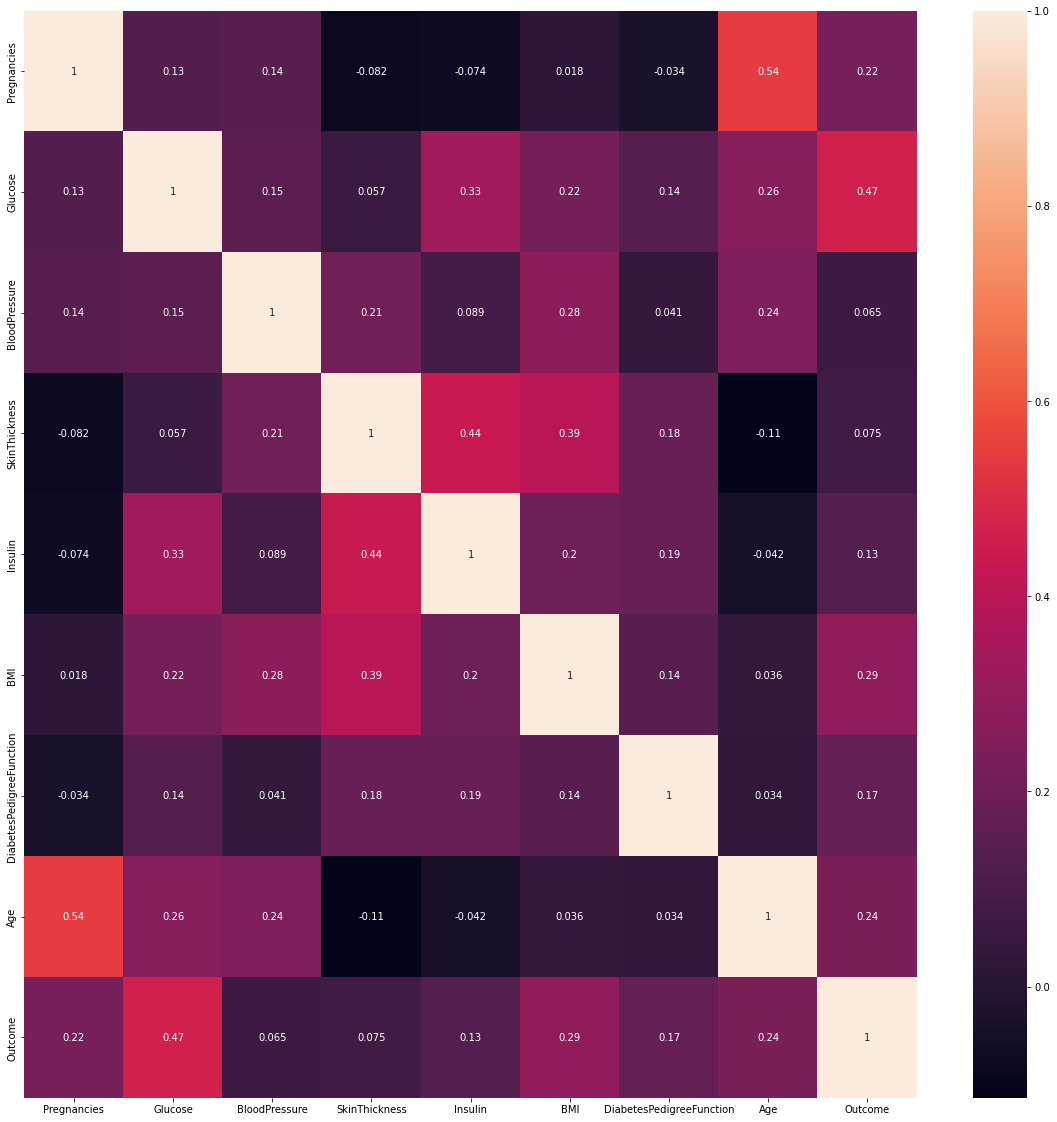

In [26]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(base.corr(), annot = True)

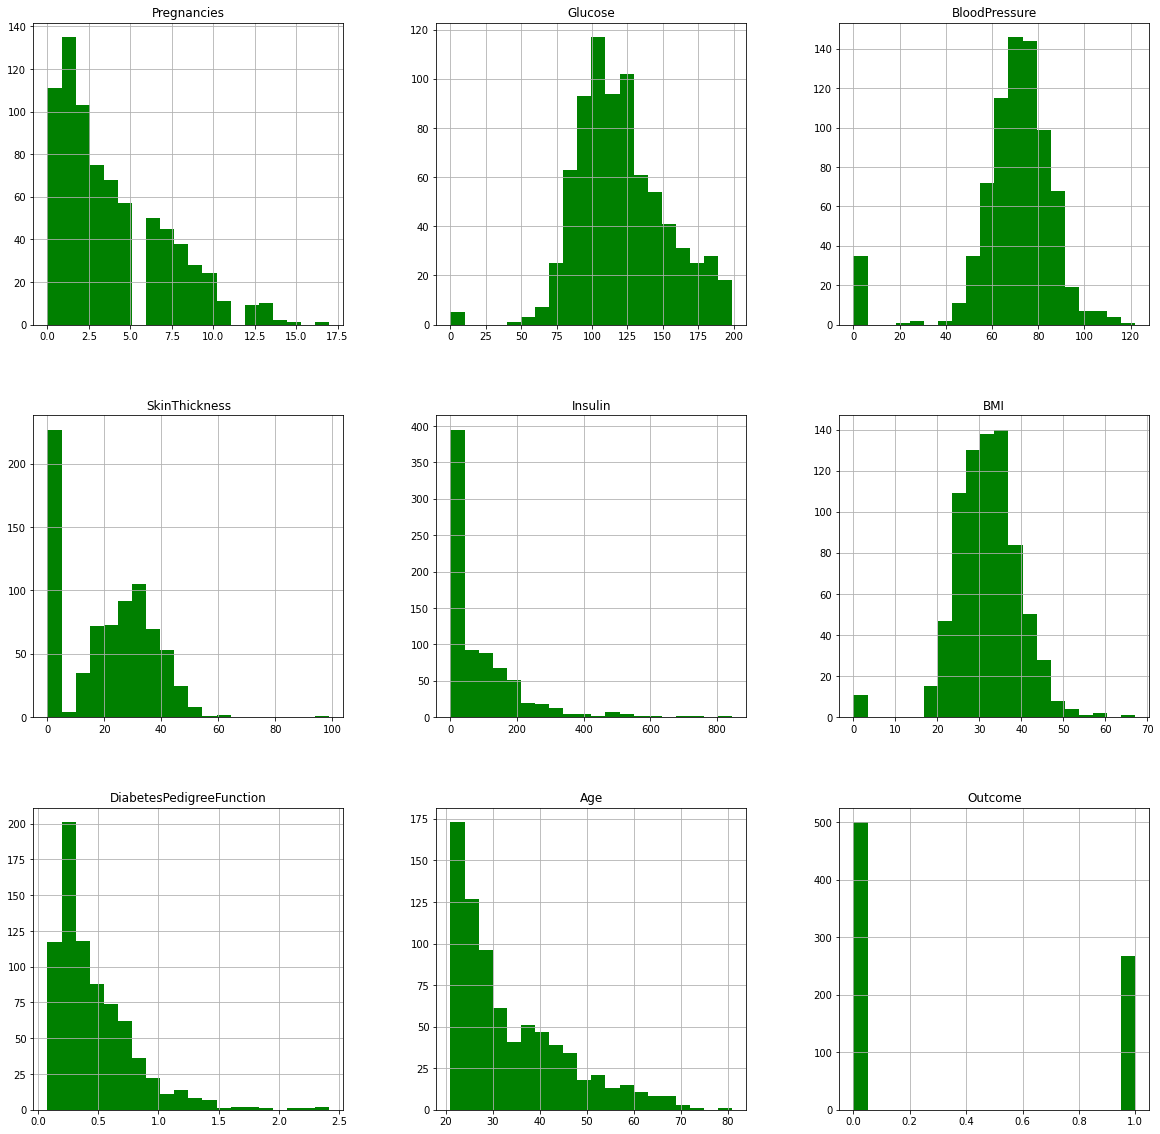

In [27]:
base.hist(bins = 20, figsize = (20,20), color = 'g');

In [35]:
eixox = ['Age', 'SkinThickness', 'Glucose', 'Pregnancies', 'Insulin']
eixox

['Age', 'SkinThickness', 'Glucose', 'Pregnancies', 'Insulin']

In [36]:
x = base[eixox]
x

,Age,SkinThickness,Glucose,Pregnancies,Insulin
0,50,35,148,6,0
1,31,29,85,1,0
2,32,0,183,8,0
3,21,23,89,1,94
4,33,35,137,0,168
...,...,...,...,...,...
763,63,48,101,10,180
764,27,27,122,2,0
765,30,23,121,5,112
766,47,0,126,1,0


In [37]:
y = base['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [39]:
y = y.values.reshape(-1,1)

In [40]:
y_scaled = scaler.fit_transform(y)
y_scaled

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size = 0.30 )

In [44]:
X_train.shape

(537, 5)

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 50, activation = 'relu', input_shape = (5, )))
model.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                300       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [50]:
epochs_hist = model.fit(X_train, y_train, epochs=15)

Epoch 1/15
17/17 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.7765
Epoch 2/15
17/17 [==============================] - 0s 4ms/step - loss: 0.4536 - accuracy: 0.7840
Epoch 3/15
17/17 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.7821
Epoch 4/15
17/17 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 0.7858
Epoch 5/15
17/17 [==============================] - 0s 5ms/step - loss: 0.4519 - accuracy: 0.7709
Epoch 6/15
17/17 [==============================] - 0s 3ms/step - loss: 0.4505 - accuracy: 0.7858
Epoch 7/15
17/17 [==============================] - 0s 5ms/step - loss: 0.4501 - accuracy: 0.7747
Epoch 8/15
17/17 [==============================] - 0s 6ms/step - loss: 0.4548 - accuracy: 0.7803
Epoch 9/15
17/17 [==============================] - 0s 6ms/step - loss: 0.4501 - accuracy: 0.7784
Epoch 10/15
17/17 [==============================] - 0s 6ms/step - loss: 0.4508 - accuracy: 0.7840
Epoch 11/15
17/17 [

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
y_pred_train = model.predict(X_train)
y_pred_train

array([[0.73352635],
       [0.03167498],
       [0.09957144],
       [0.9067695 ],
       [0.74059546],
       [0.7804046 ],
       [0.08548945],
       [0.306715  ],
       [0.6501102 ],
       [0.07810771],
       [0.04542533],
       [0.07835206],
       [0.29326165],
       [0.4893695 ],
       [0.04221493],
       [0.6136901 ],
       [0.13103446],
       [0.84549296],
       [0.07149786],
       [0.73297423],
       [0.04420915],
       [0.03782621],
       [0.62208617],
       [0.24401394],
       [0.0875113 ],
       [0.0847607 ],
       [0.0512442 ],
       [0.4329048 ],
       [0.27258062],
       [0.21272314],
       [0.55867213],
       [0.7586678 ],
       [0.6031153 ],
       [0.425988  ],
       [0.1843392 ],
       [0.7318583 ],
       [0.08373573],
       [0.08831927],
       [0.04302701],
       [0.07813275],
       [0.68163335],
       [0.6811138 ],
       [0.64523435],
       [0.5267701 ],
       [0.1580315 ],
       [0.46963134],
       [0.12424871],
       [0.053

In [54]:
y_pred_train = (y_pred_train > 0.5)
y_pred_train

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [55]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[309,  35],
       [ 86, 107]])

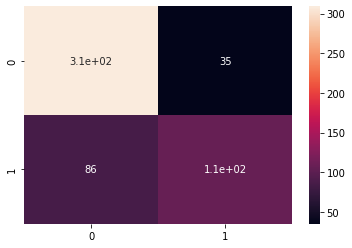

In [56]:
sns.heatmap(cm, annot=True);

In [57]:
y_pred_test = model.predict(x_test)
y_pred_test = (y_pred_test > 0.5)
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True);

NameError: ignored